In [48]:
from specutils.analysis import equivalent_width
from specutils.fitting import fit_generic_continuum
from specutils import Spectrum1D
from specutils import SpectralRegion
from astropy.io import fits
from astropy import units as u
from astropy.table import Table
import warnings
import matplotlib.pyplot as plt

mast_file_1 =fits.open('./Spectra1D/MAST/jw01210-o001_s000005113_nirspec_clear-prism_x1d.fits')
mast_file_2=fits.open('./Spectra1D/MAST/jw01210-o001_s000009693_nirspec_clear-prism_x1d.fits')
mast_file_3=fits.open('./Spectra1D/MAST/jw01210-o001_s000035295_nirspec_clear-prism_x1d.fits')


Compute Equivalent Width (EW) of Halpha for some examples

In [32]:
# Define function to plot spectrum 

def plot__mast_spectrum(MAST_file, z):
  
  
    # ~ fits.open('file.fits')
    t_MAST=Table.read(MAST_file, hdu="EXTRACT1D")
    w_MAST=t_MAST['WAVELENGTH']
    flux_MAST=t_MAST['FLUX'] #flux in Jy
    
    #rest_w=w/(1+z) #in micras
    #rest_w_Angstrom=rest_w*1e-6/1e-10 # rest wavelength in Angstrom
    w_Angstrom=w_MAST*1e-6/1e-10 # observed wavelength in Angstrom
    flux_ergs = 2.99792458E-05 *flux_MAST / w_Angstrom**2. #flux in erg s^-1 cm^-2 A^-1


    plt.rcParams["figure.figsize"] = (8, 6)
    #plt.title(f'ID 100{ID}, z={z}', fontsize=18.)
    
    plt.step(w_Angstrom,flux_ergs, label='MAST Data-Archive', color='Blue')

    plt.xlabel(r'$\lambda_{obs}$ [$\AA$]', fontsize=22)
    plt.ylabel(r'FLUX [erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$]', fontsize=22)
    legend=plt.legend(loc=4,labelspacing=0.1)
    legend=plt.legend(loc='best',labelspacing=0.1)
    plt.setp(legend.get_texts(),fontsize='14')
    #plt.savefig(f"PRISM_Plots/ShortList_with_redshift/100{ID}.pdf")
    plt.show()    
    


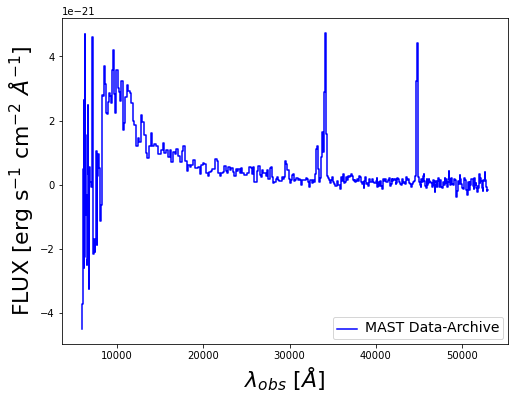

In [33]:
# Plot the spectrum
z1 = 5.82
plot__mast_spectrum(mast_file_1, z = z1)

In [8]:
z = z1
specdata = mast_file_1[1].data


lamb_obs = specdata['WAVELENGTH'] * 1e-6/1e-10 
lamb = specdata['WAVELENGTH'] * 1e-6/1e-10 / (1.+float(z)) * u.AA
flux= specdata['FLUX']*2.99792458E-05/ lamb_obs**2 * u.Unit('erg cm-2 s-1 AA-1')
spec= Spectrum1D(spectral_axis=lamb, flux=flux)
cont_norm_spec = spec / fit_generic_continuum(spec)(spec.spectral_axis)

EW_Ha=equivalent_width(cont_norm_spec, continuum=1, regions=SpectralRegion(6550 * u.AA, 6580 * u.AA))

print(EW_Ha)


2800.0019400120837 Angstrom


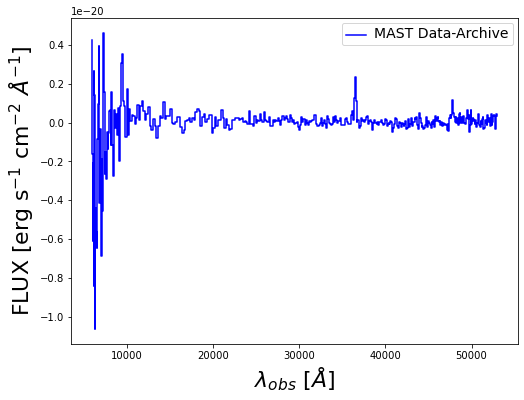

In [13]:
z2 = 6.285
plot__mast_spectrum(mast_file_2, z = z2)

In [14]:
z = z2
specdata = mast_file_2[1].data


lamb_obs = specdata['WAVELENGTH'] * 1e-6/1e-10 
lamb = specdata['WAVELENGTH'] * 1e-6/1e-10 / (1.+float(z)) * u.AA
flux= specdata['FLUX']*2.99792458E-05/ lamb_obs**2 * u.Unit('erg cm-2 s-1 AA-1')
spec= Spectrum1D(spectral_axis=lamb, flux=flux)
cont_norm_spec = spec / fit_generic_continuum(spec)(spec.spectral_axis)

EW_Ha=equivalent_width(cont_norm_spec, continuum=1, regions=SpectralRegion(6550 * u.AA, 6580 * u.AA))

print(EW_Ha)

-1792.1986159864764 Angstrom


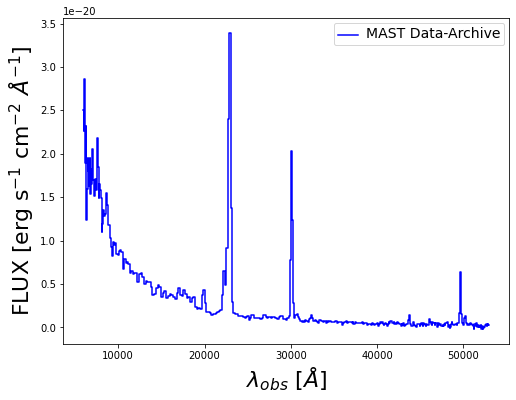

In [19]:
z3 = 3.5889
plot__mast_spectrum(mast_file_3, z = z3)

In [25]:
z = z3
specdata = mast_file_3[1].data


lamb_obs = specdata['WAVELENGTH'] * 1e-6/1e-10 
lamb = specdata['WAVELENGTH'] * 1e-6/1e-10 / (1.+float(z)) * u.AA
flux= specdata['FLUX']*2.99792458E-05/ lamb_obs**2 * u.Unit('erg cm-2 s-1 AA-1')
spec= Spectrum1D(spectral_axis=lamb, flux=flux)
cont_norm_spec = spec / fit_generic_continuum(spec)(spec.spectral_axis)

EW_Ha=equivalent_width(cont_norm_spec, continuum=1, regions=SpectralRegion(6530 * u.AA, 6580 * u.AA))

print(EW_Ha)

-1073.3350780205749 Angstrom


Function that receives filename and redshift and returns EW for Halpha and [OIII]

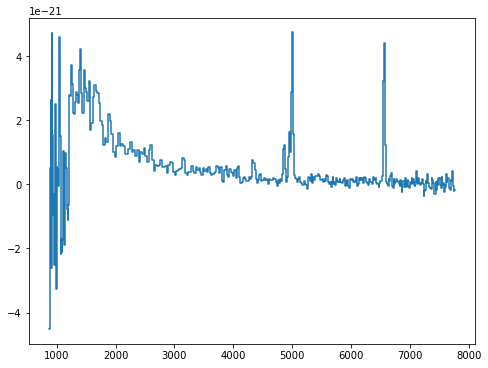

2800.0019400120837 Angstrom -421.40116911368665 Angstrom


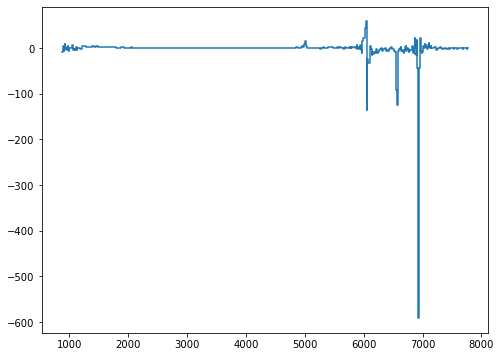

In [59]:
def compute_EW(mast_filename, z):
    with fits.open(mast_filename) as file:
        
        #Extract data from the file
        specdata=file[1].data
        
        #Compute rest wavelength
        lambda_obs = specdata['WAVELENGTH'] * 1e-6 / 1e-10 #convert from um to AA. 
        lambda_rest = lambda_obs / (1.+float(z)) 
        lambda_rest_Angstrom = lambda_rest * u.AA #u.AA just includes the units
        
        #Extract and convert flux to working units
        flux = specdata['FLUX'] * 2.99792458E-05 /lambda_obs**2 
        flux_Units = flux * u.Unit('erg cm-2 s-1 AA-1')
        
        #Define the spectrum over which the EW will be calculated, use class Spectrum1D from specutils
        spectrum = Spectrum1D(spectral_axis=lambda_rest_Angstrom, flux=flux_Units)
        
        #Plot the spectrum
        plt.step(spectrum.spectral_axis, spectrum.flux)
        plt.show()
        
        with warnings.catch_warnings(): #ignore warnings
            warnings.simplefilter('ignore')
            
            # Normalize the spectrum by its continuum
            spec_continuum_fitted = fit_generic_continuum(spectrum)(spectrum.spectral_axis)
            normalized_continuum_spec = spectrum / spec_continuum_fitted
            
        #Plot the normalized continuum spectrum: the old spectrum normalized by the fitted continuum
        plt.step(normalized_continuum_spec.wavelength, normalized_continuum_spec.flux)
        #plt.xlim(6450 , 6650)
        
        #Compute EW for Ha
        region_Ha = SpectralRegion(6550 * u.AA, 6580 * u.AA) #This is in rest frame since lambda=lambda_rest
        region_OIII = SpectralRegion(4990 * u.AA, 5024 * u.AA)
        
        EW_Ha=equivalent_width(normalized_continuum_spec, regions=region_Ha)
        EW_OIII=equivalent_width(normalized_continuum_spec, continuum=1, regions=region_OIII) 
        print(EW_Ha, EW_OIII)
        
        
compute_EW('./Spectra1D/MAST/jw01210-o001_s000005113_nirspec_clear-prism_x1d.fits', 5.82)